In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set(style="darkgrid")


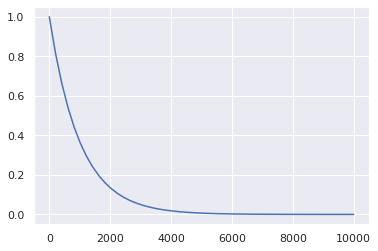

In [2]:
x = np.linspace(0, 10000)
plt.plot(x, 0.999**x)

In [389]:
def function(arrayMatrix, threshold=1):
    zscore = (arrayMatrix - arrayMatrix.mean())/arrayMatrix.std()
    return np.where(np.abs(zscore) > threshold)

MatrixOne = np.array([[1,2,10],[1,10,2]])   
print(function(MatrixOne))

(array([0, 1]), array([2, 1]))


In [372]:
data.shape

(3, 50)

In [413]:
data = np.stack(hsac_data['data'])

In [414]:
d = np.abs(data - np.median(data, axis=0, keepdims=True))
mdev = np.median(d, axis=0, keepdims=True)
s = d/(mdev if mdev.all() else 1)

In [415]:
s.shape

(3, 50)

In [409]:
np.stack(np.where(s<2)).shape

(2, 253)

In [407]:
n_arr = []
for i, j in np.stack(np.where(s < 2)).T:
    n_arr.append(data[i,j])

[2.106313718174351,
 16.640594300775366,
 17.52762914328102,
 24.954974693447163,
 40.367198665105185,
 35.27859396471309,
 47.187557768529345,
 55.603299794711035,
 47.44736952629829,
 200.78608810260468,
 126.21031532728466,
 586.0317656696471,
 280.13476639872096,
 240.21799781779046,
 503.0103649284637,
 429.04885192126454,
 533.4019883679584,
 447.34635883725923,
 457.6130147884845,
 224.54842069268108,
 616.657664377945,
 636.8408414618818,
 303.53467556260335,
 316.50115117392596,
 579.0105153554084,
 414.0913769911,
 505.37731532490386,
 215.41834865593734,
 332.6263270537068,
 453.12686507804744,
 626.4083444706696,
 433.14100541307243,
 426.0145200677887,
 430.83768883058025,
 551.3228255072409,
 253.5215294758159,
 363.4368783582153,
 465.1280119975893,
 449.63133483499837,
 3.5191684749326666,
 5.56746606615469,
 4.039171349300121,
 14.368876923807633,
 24.692270761943046,
 29.631975011043075,
 56.45823173360517,
 53.10603516324669,
 102.25881965084837,
 119.16075921964563,

In [431]:
idxs = s<2

In [432]:
dd = []
for i in range(idxs.shape[1]):
    dd.append(np.mean(data[idxs[:,i], i]))

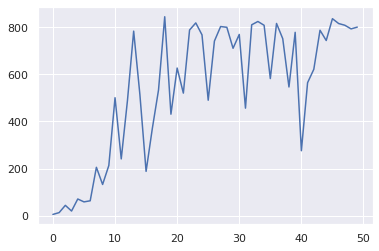

In [433]:
plt.plot(dd)

In [329]:
mdev if mdev.all() else 1

1

In [322]:
reject_outliers_2(np.array([10,10,10,17,10,10]))

[0. 0. 0. 7. 0. 0.]
0.0
1.0


array([10, 10, 10, 10, 10])

In [505]:
def reject_outliers_2(data, m=2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    print(d)
    print(mdev)
    print(mdev if mdev else 1.)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

def process_data(env_path):
    data = []
    min_size = np.inf
    for path in glob.glob(env_path + '*/'):
        data_set = pickle.load(open(path + 'reward_data.pkl', 'rb'))
        data_set = np.stack(data_set)
        if data_set[-1,0] < min_size:
            min_size = data_set[-1,0]
        data.append(data_set)
    x_samples = np.linspace(0, min_size)
    interp_data = []
    for data_set in data:
        _x = data_set[:,0]
        _y = data_set[:,1]
        interp_data.append(np.interp(x_samples, _x, _y))

#     _data = np.stack(interp_data)
#     d = np.abs(_data - np.median(_data, axis=0, keepdims=True))
#     mdev = np.median(d, axis=0, keepdims=True)
#     s = d/(mdev if mdev.all() else 1)
#     idxs = s < 2
#     mean = []
#     std  = []
#     for i in range(idxs.shape[1]):
#         mean.append(np.mean(_data[idxs[:,i], i]))
#         std.append(np.std(_data[idxs[:,i], i]))
    
    mean = np.mean(interp_data, axis=0)
    std  = np.std(interp_data, axis=0)
    mean = np.array(mean)
    std = np.array(std)
    data_log = {'x' : x_samples, 'mean' : mean, 'std' : std, 
                'max' : np.max(interp_data, axis=0),
               'min' : np.min(interp_data, axis=0),
               '-std' : mean-std,
               '+std' : mean+std, 'data' : interp_data}
    return data_log

def plot_data(log, label):
    plt.plot(log['x'], log['mean'], label=label)
    plt.fill_between(log['x'], 
                    log['-std'], log['+std'],
                    alpha=0.2)


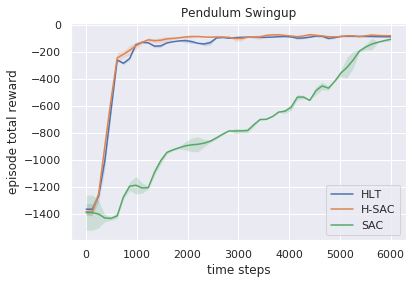

In [506]:

# hddpg_data = process_data('./benchmarks/data/PendulumEnv/h_ddpg/')
# ddpg_data = process_data('./benchmarks/data/PendulumEnv/ddpg/')
hlt_data = process_data('./benchmarks/data/PendulumEnv/hlt_skill/')
hsac_data = process_data('./benchmarks/data/PendulumEnv/h_sac/')
sac_data = process_data('./benchmarks/data/PendulumEnv/sac/')

plot_data(hlt_data, 'HLT')

plot_data(hsac_data, 'H-SAC')

# plot_data(ddpg_data, 'DDPG')
plot_data(sac_data, 'SAC')


plt.xlabel('time steps')
plt.ylabel('episode total reward')
plt.title('Pendulum Swingup')

plt.legend()



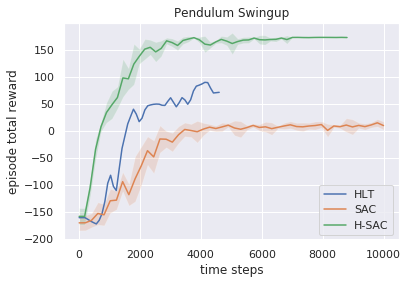

In [522]:
# hddpg_data = process_data('./benchmarks/data/InvertedPendulumSwingupBulletEnv/h_ddpg/')
# ddpg_data = process_data('./benchmarks/data/InvertedPendulumSwingupBulletEnv/ddpg/')

hlt_data = process_data('./benchmarks/data/InvertedPendulumSwingupBulletEnv/hlt_skill/')


hsac_data = process_data('./benchmarks/data/InvertedPendulumSwingupBulletEnv/h_sac/')
sac_data = process_data('./benchmarks/data/InvertedPendulumSwingupBulletEnv/sac/')

plot_data(hlt_data, 'HLT')
# plot_data(hddpg_data, 'H-DDPG')

plot_data(sac_data, 'SAC')
plot_data(hsac_data, 'H-SAC')

plt.xlabel('time steps')
plt.ylabel('episode total reward')
plt.title('Pendulum Swingup')

plt.legend()

(-400, 200)

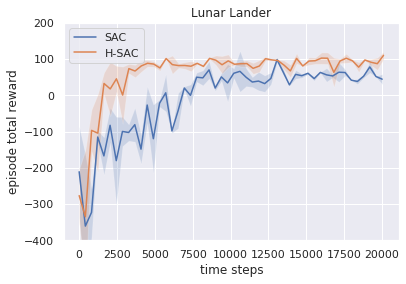

In [508]:
hddpg_data = process_data('./benchmarks/data/LunarLanderContinuousEnv/h_ddpg/')
ddpg_data = process_data('./benchmarks/data/LunarLanderContinuousEnv/ddpg/')

hsac_data = process_data('./benchmarks/data/LunarLanderContinuousEnv/h_sac/')
# hsac_data = process_data('./benchmarks/data/LunarLanderContinuousEnv/h_ddpg/')

sac_data = process_data('./benchmarks/data/LunarLanderContinuousEnv/sac/')

# plot_data(ddpg_data, 'DDPG')
# plot_data(hddpg_data, 'H-DDPG')

plot_data(sac_data, 'SAC')
plot_data(hsac_data, 'H-SAC')


plt.xlabel('time steps')
plt.ylabel('episode total reward')
plt.title('Lunar Lander')

plt.legend()
plt.ylim(-400, 200)

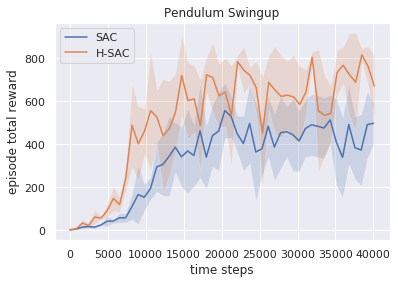

In [509]:
hsac_data = process_data('./benchmarks/data/HopperBulletEnv/h_sac/')
sac_data = process_data('./benchmarks/data/HopperBulletEnv/sac/')
hddpg_data = process_data('./benchmarks/data/HopperBulletEnv/h_ddpg/')
ddpg_data = process_data('./benchmarks/data/HopperBulletEnv/ddpg/')

# plot_data(ddpg_data, 'DDPG')
# plot_data(hddpg_data, 'H-DDPG')

plot_data(sac_data, 'SAC')

plot_data(hsac_data, 'H-SAC')

plt.xlabel('time steps')
plt.ylabel('episode total reward')
plt.title('Pendulum Swingup')

plt.legend()


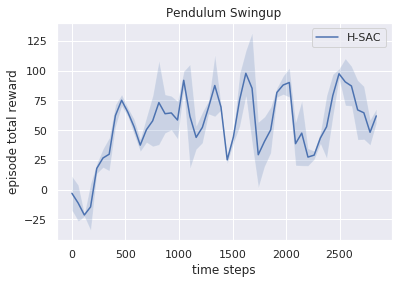

In [496]:
hsac_data = process_data('./benchmarks/data/KukaEnv/h_sac/')
# sac_data = process_data('./benchmarks/data/HopperBulletEnv/sac/')

# plot_data(ddpg_data, 'DDPG')
# plot_data(hddpg_data, 'H-DDPG')

# plot_data(sac_data, 'SAC')
plot_data(hsac_data, 'H-SAC')

plt.xlabel('time steps')
plt.ylabel('episode total reward')
plt.title('Pendulum Swingup')

plt.legend()